# 各要求技能レベルに対して、かかる時間の期待値を求める

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_samples = 10 ** 7
K = 20  # 技能数
s_ = np.abs(np.random.randn(n_samples, K))
q = np.random.uniform(20.0, 60.0, n_samples) / np.sqrt((s_ * s_).sum(1))
s = np.round(q[:, None] * s_)

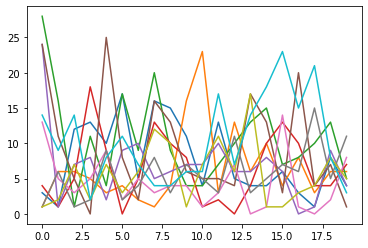

In [3]:
plt.plot(s[:10].T)
plt.show()

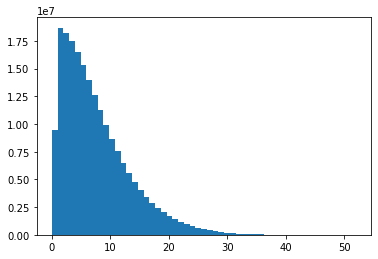

In [4]:
# 能力の分布
plt.hist(s.ravel(), bins=int(s.max())+1)
plt.show()

In [5]:
expected = []
for d in range(0, 41):
    t = np.maximum(d - s.ravel(), 0)
    ex = t.mean()
    expected.append(ex)

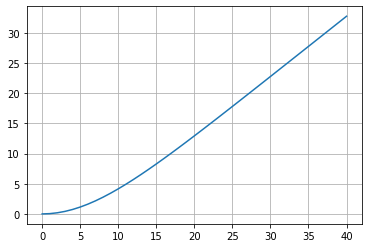

In [6]:
# 横軸: 要求技能
# 縦軸: かかる時間
plt.plot(expected)
plt.grid()

In [7]:
n_samples = 10 ** 7
expecteds = []
for K in range(10, 21):
    print(K)
    s_ = np.abs(np.random.randn(n_samples, K))
    q = np.random.uniform(20.0, 60.0, n_samples) / np.sqrt((s_ * s_).sum(1))
    s = np.round(q[:, None] * s_)
    expected = []
    for d in range(0, 41):
        t = np.maximum(d - s.ravel(), 0)
        ex = t.mean()
        expected.append(ex)
    expecteds.append(expected)

10
11
12
13
14
15
16
17
18
19
20


In [8]:
print("{")
for ex in expecteds:
    print("{", end="")
    print(*[f"{e:.8f}" for e in ex], sep=",", end="")
    print("},")
print("}")

{
{0.00000000,0.03195550,0.12764459,0.28633275,0.50694044,0.78798031,1.12752661,1.52334824,1.97293306,2.47349386,3.02206879,3.61554764,4.25077833,4.92452404,5.63366531,6.37513917,7.14593268,7.94328855,8.76460051,9.60745786,10.46961478,11.34906941,12.24398152,13.15267632,14.07363038,15.00545454,15.94688350,16.89680181,17.85415465,18.81803528,19.78759880,20.76210771,21.74088590,22.72332859,23.70890663,24.69715341,25.68765228,26.68003924,27.67399626,28.66925221,29.66557043},
{0.00000000,0.03375507,0.13479280,0.30232359,0.53503714,0.83109422,1.18821984,1.60379821,2.07483481,2.59814405,3.17032517,3.78784261,4.44711809,5.14465639,5.87701705,6.64087846,7.43313992,8.25086437,9.09140174,9.95229535,10.83129715,11.72641403,12.63579902,13.55780194,14.49092046,15.43382513,16.38529058,17.34423924,18.30969105,19.28077897,20.25672931,21.23684461,22.22052043,23.20720286,24.19642596,25.18777684,26.18089993,27.17548576,28.17127365,29.16803555,30.16557593},
{0.00000000,0.03548827,0.14162692,0.31753566,0.5

# 能力の分布を見る

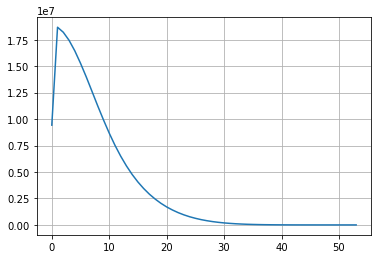

In [2]:
n_samples = 10 ** 7
K = 20  # 技能数
s_ = np.abs(np.random.randn(n_samples, K))
q = np.random.uniform(20.0, 60.0, n_samples) / np.sqrt((s_ * s_).sum(1))
s = np.round(q[:, None] * s_)
plt.plot(np.bincount(s.astype(np.int32).ravel()))
plt.grid()

In [3]:
s.mean()

7.222011365

In [4]:
n_samples = 10 ** 7
means = []
hists = []
for K in range(10, 21):
    print(K)
    s_ = np.abs(np.random.randn(n_samples, K))
    q = np.random.uniform(20.0, 60.0, n_samples) / np.sqrt((s_ * s_).sum(1))
    s = np.round(q[:, None] * s_)
    means.append(s.mean())
    hist = np.bincount(s.ravel().astype(np.int32), minlength=61)
    hists.append(hist)

10
11
12
13
14
15
16
17
18
19
20


In [5]:
print("{", end="")
print(*[f"{m:.8f}" for m in means], sep=",", end="")
print("}")

{10.34362034,9.84129700,9.40392329,9.02020421,8.68015814,8.37453234,8.10205331,7.85179609,7.62366211,7.41497969,7.22276488}


In [6]:
print("{")
for hist in hists:
    print("{", end="")
    print(*[f"{h:.8f}" for h in hist / hist.sum()], sep=",", end="")
    print("},")
print("}")

{
{0.03199358,0.06368178,0.06305036,0.06192850,0.06043657,0.05849638,0.05626998,0.05378124,0.05096481,0.04803811,0.04487573,0.04173182,0.03857524,0.03535695,0.03231937,0.02933553,0.02657940,0.02393169,0.02151936,0.01931420,0.01728974,0.01544169,0.01377925,0.01225258,0.01088206,0.00960582,0.00847646,0.00745854,0.00652507,0.00568167,0.00493471,0.00427288,0.00366315,0.00314178,0.00266986,0.00225166,0.00188762,0.00157227,0.00130075,0.00105789,0.00086575,0.00069207,0.00054223,0.00043122,0.00032470,0.00024561,0.00018435,0.00013126,0.00009303,0.00006432,0.00004107,0.00002563,0.00001604,0.00000882,0.00000480,0.00000203,0.00000081,0.00000018,0.00000003,0.00000000,0.00000000},
{0.03376853,0.06730558,0.06649401,0.06514447,0.06333945,0.06106338,0.05840555,0.05550430,0.05228855,0.04883704,0.04535258,0.04175391,0.03823655,0.03483059,0.03150548,0.02836674,0.02549720,0.02280790,0.02035080,0.01809479,0.01611119,0.01428379,0.01262889,0.01113925,0.00978007,0.00856836,0.00748140,0.00649721,0.00563434,0.00